## Project Overview:

The objective of this project is to forecast future energy consumption in United Kingdom using historical data on energy usage from smart meters, weather conditions, and demographic information. By leveraging advanced machine learning models, we aim to provide accurate energy consumption predictions that can help in resource planning, reducing costs, and promoting efficient energy usage in United Kingdom.


## Motivation 
In light of the current energy situation, this project aims to raise awareness about the importance of energy conservation. With increasing energy demand, it is crucial to understand that sustainable energy practices are necessary to ensure that energy remains available for everyone. By analyzing historical data and forecasting future trends, this dashboard underscores the need for efficient energy use and the adoption of renewable energy sources.


## About Dataset

### Data on Energy by Our World in Data

Complete Energy dataset is a collection of key metrics maintained by Our World in Data. It is updated regularly and includes data on energy consumption (primary energy, per capita, and growth rates), energy mix, electricity mix, and other relevant metrics.

- **Variables**: The dataset includes variables related to energy consumption, energy mix, electricity mix, and other metrics of interest.

### Data Sources and Processing

The dataset is built upon multiple sources and processing steps:

- **Statistical Review of World Energy (Energy Institute, EI)**
- **International Energy Data (U.S. Energy Information Administration, EIA)**
- **Energy from Fossil Fuels (The Shift Dataportal)**
- **Yearly Electricity Data (Ember)**
- **European Electricity Review (Ember)**
- **Combined Electricity (Our World in Data based on Ember's data)**
- **Energy Mix and Fossil Fuel Production (Our World in Data)**
- **Primary Energy Consumption (Our World in Data)**
- **Electricity Mix (Our World in Data)**

Additional datasets and processing steps include:

- **Regions (Our World in Data)**
- **Population (Our World in Data)**
- **Income Groups (World Bank)**
- **GDP (University of Groningen GGDC's Maddison Project Database)**

### Changelog Highlights

- **July 7, 2023**: Replaced BP's data with the new Energy Institute Statistical Review of World Energy 2023.
- **June 1, 2023**: Updated Ember's yearly electricity data.
- **March 1, 2023**: Updated Ember's yearly electricity data and fixed minor issues.
- **December 30, 2022**: Addressed inconsistencies in BP's dataset.

### License

All visualizations, data, and code produced by Our World in Data are open access under the Creative Commons BY license. Data produced by third parties are subject to the original authors' license terms.

### Authors

- Hannah Ritchie
- Pablo Rosado
- Edouard Mathieu
- Max Roser

Our World in Data makes data and research on the world’s largest problems understandable and accessible. Read more about our mission on [Our World in Data](https://ourworldindata.org).





## Problem Statements:

### Historical Analysis and Trend Identification:

- How has energy consumption changed over the years in United Kingdom?
  
- What are the key factors influencing changes in energy consumption in United Kingdom, such as population growth, GDP, and weather conditions?


### Seasonal and Demographic Patterns:

- What seasonal pattern in United Kingdom's energy consumption data?
  
- How do demographic factors such as population size and GDP per capita correlate with energy consumption in United Kingdom?

  
### Impact of Different Energy Sources:

- How do changes in the consumption of different energy sources (e.g.United Kingdom, coal) affect  United Kingdom's overall energy consumption?

- What is the share of different energy sources in electricity and overall energy consumption in United Kingdom?


### Carbon Intensity and Environmental Impact:

- What is the trend in carbon intensity of electricity generation emissions in United Kingdom?


### Forecasting Future Energy Consumption:

- Can we accurately forecast future energy consumption in United Kingdion compared to traditional methods?

### Expected Outcomes:

1. Detailed insights into historical energy consumption patterns and key influencing factors in United Kingdom.

2. Accurate forecasts of future energy consumption, aiding in better planning and resource allocation.

3. Interactive Power BI dashboards providing comprehensive visualizations of United Kingdom's energy consumption data, trends, and forecasts.

## Methodology

**Data Collection**: Gather data from various sources and preprocess it for analysis.

**Exploratory Data Analysis (EDA)**: Understand the data through visualization and statistical analysis.

**Feature Engineering**: Create relevant features from raw data that can improve model performance.

**Model Building**: Use time series analysis and machine learning models to predict future energy consumption.

**Model Evaluation**: Assess model performance using appropriate metrics.

**Visualization**: Present the findings through visualizations that highlight key trends and predictions.


## Implementation Details

### Data Preprocessing
- Load and clean the dataset to handle missing values and outliers.
- Convert data types and ensure correct indexing for time series analysis.

### Exploratory Data Analysis
- Visualize historical energy consumption trends.
- Analyze the impact of weather conditions and demographic factors on energy consumption.

### Time Series Analysis
- Decompose the time series to identify trend, seasonality, and residual components.
- Use Autoregressive Integrated Moving Average (ARIMA) and Seasonal ARIMA (SARIMA) models for forecasting.
- Evaluate model performance using metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

### Machine Learning Models
- Implement advanced models like SARIMAX for capturing exogenous variables.
- Train and test models on historical data to ensure accuracy.
- Forecasting
- Generate forecasts for future energy consumption based on the best-performing model.
- Visualize the forecasted energy consumption alongside historical data.

### Visualization
- Create interactive plots to display historical trends and future predictions.
- Highlight key insights and actionable recommendations for energy conservation.




## Data Collection and Preprocessing 

In [30]:
import pandas as pd 
import numpy as np 


In [31]:
## Loading the dataset that was downlaoded from kaggle names "World Energy Consumption" published by Pralabh Poudel updated 6 months ago
dataset = pd.read_csv(r"C:\Users\user\Desktop\Energy Project\World Energy Consumption.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## filtering the data for Nigeria
df = dataset[dataset['country']=='United Kingdom']

print(f"The length of observations: {len(df)}")
print()

## converting the year columns to datatime
df['year'] = pd.to_datetime(df['year'],format='%Y', errors='coerce')

## setting the datat columns as the index 
df = df.set_index(df['year'])

## drop year column
df.drop(['year'],axis = 1, inplace=True)

## total energy consumed 
df['total_energy_consumption'] = df[['biofuel_consumption', 'coal_consumption', 'fossil_fuel_consumption',  'gas_consumption', 'hydro_consumption', 'low_carbon_consumption', 'nuclear_consumption', 'oil_consumption', 'primary_energy_consumption','renewables_consumption', 'solar_consumption', 'wind_consumption']].sum(axis=1)

energy_df = df[['biofuel_consumption', 'coal_consumption', 'fossil_fuel_consumption',  'gas_consumption', 'hydro_consumption', 'low_carbon_consumption', 'nuclear_consumption', 'oil_consumption', 'primary_energy_consumption','renewables_consumption', 'solar_consumption', 'wind_consumption', 'total_energy_consumption']]

## checking the first few rows of the data
df.head(5)





The length of observations: 123



C:\Users\user\AppData\Local\Temp\ipykernel_12980\2413586329.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_datetime(df['year'],format='%Y', errors='coerce')


country iso_code  population           gdp  \
year                                                            
1900-01-01  United Kingdom      GBR  41089602.0  3.125311e+11   
1901-01-01  United Kingdom      GBR  41459153.0  3.121996e+11   
1902-01-01  United Kingdom      GBR  41827091.0  3.198531e+11   
1903-01-01  United Kingdom      GBR  42193357.0  3.160846e+11   
1904-01-01  United Kingdom      GBR  42562831.0  3.176650e+11   

            biofuel_cons_change_pct  biofuel_cons_change_twh  \
year                                                           
1900-01-01                      NaN                      NaN   
1901-01-01                      NaN                      NaN   
1902-01-01                      NaN                      NaN   
1903-01-01                      NaN                      NaN   
1904-01-01                      NaN                      NaN   

            biofuel_cons_per_capita  biofuel_consumption  \
year                                                       
1900-01-01                      NaN                  NaN   
1901-01-01                      NaN                  NaN   
1902-01-01                      NaN                  NaN   
1903-01-01                      NaN                  NaN   
1904-01-01                      NaN                  NaN   

            biofuel_elec_per_capita  biofuel_electricity  biofuel_share_elec  \
year                                                                           
1900-01-01                      NaN                  NaN                 NaN   
1901-01-01                      NaN                  NaN                 NaN   
1902-01-01                      NaN                  NaN                 NaN   
1903-01-01                      NaN                  NaN                 NaN   
1904-01-01                      NaN                  NaN                 NaN   

            biofuel_share_energy  carbon_intensity_elec  coal_cons_change_pct  \
year                                                                            
1900-01-01                   NaN                    NaN                   NaN   
1901-01-01                   NaN                    NaN                   NaN   
1902-01-01                   NaN                    NaN                   NaN   
1903-01-01                   NaN                    NaN                   NaN   
1904-01-01                   NaN                    NaN                   NaN   

            coal_cons_change_twh  coal_cons_per_capita  coal_consumption  \
year                                                                       
1900-01-01                   NaN                   NaN               NaN   
1901-01-01                   NaN                   NaN               NaN   
1902-01-01                   NaN                   NaN               NaN   
1903-01-01                   NaN                   NaN               NaN   
1904-01-01                   NaN                   NaN               NaN   

            coal_elec_per_capita  coal_electricity  coal_prod_change_pct  \
year                                                                       
1900-01-01                   NaN               NaN                   NaN   
1901-01-01                   NaN               NaN                -2.724   
1902-01-01                   NaN               NaN                 3.674   
1903-01-01                   NaN               NaN                 1.426   
1904-01-01                   NaN               NaN                 0.909   

            coal_prod_change_twh  coal_prod_per_capita  coal_production  \
year                                                                      
1900-01-01                   NaN             38122.945         1566.457   
1901-01-01               -42.668             36753.977         1523.789   
1902-01-01                55.984             37769.137         1579.773   
1903-01-01                22.532             37975.297         1602.305   
1904-01-01                14.570             379

In [32]:
## checking for missing values 
missing_values=df.isna().sum()

In [33]:
## handling missing values in both numeric variables and numeric variables
def handle_missing(data):
    numeric_columns = data.select_dtypes(include=['int', 'float']).columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    
    """
    Replacing the missing values in the numeric columns with 0 
    """
    for column, value in data[numeric_columns].isna().sum().items():
        if value > 0:
            data[column] = data[column].fillna(0)
            print(f"The missing values in {column} have been replaced with 0")
        else:
            print(f"There are no missing values in {column}")

    """
    Replacing the missing values in the categorical columns with 'unknown' 
    """
    for column, value in data[categorical_columns].isna().sum().items():
        if value > 0:
            data[column] = data[column].fillna('unknown')
            print(f"The missing values in {column} have been replaced with 'unknown'")
        else:
            print(f"There are no missing values in {column}")
handle_missing(df)

There are no missing values in population
The missing values in gdp have been replaced with 0
The missing values in biofuel_cons_change_pct have been replaced with 0
The missing values in biofuel_cons_change_twh have been replaced with 0
The missing values in biofuel_cons_per_capita have been replaced with 0
The missing values in biofuel_consumption have been replaced with 0
The missing values in biofuel_elec_per_capita have been replaced with 0
The missing values in biofuel_electricity have been replaced with 0
The missing values in biofuel_share_elec have been replaced with 0
The missing values in biofuel_share_energy have been replaced with 0
The missing values in carbon_intensity_elec have been replaced with 0
The missing values in coal_cons_change_pct have been replaced with 0
The missing values in coal_cons_change_twh have been replaced with 0
The missing values in coal_cons_per_capita have been replaced with 0
The missing values in coal_consumption have been replaced with 0
The 

In [34]:
## checking for duplicated rows
def handle_duplicates(data):
    duplicated_rows = data.duplicated().sum()
    print(f"There are {duplicated_rows} duplicated rows in the dataset")
    if duplicated_rows > 0:
        data.drop_duplicates(inplace=True)
        print(f"The duplciated rows have been dropped")
    else:
        print("There are no duplicated rows in the dataset")

handle_duplicates(df)

There are 0 duplicated rows in the dataset
There are no duplicated rows in the dataset


## Exploratory Data Analysis

In [35]:
## Descriptive Statistics
df.describe(include='all').T

count unique             top  \
country                                         123      1  United Kingdom   
iso_code                                        123      1             GBR   
population                                    123.0    NaN             NaN   
gdp                                           123.0    NaN             NaN   
biofuel_cons_change_pct                       123.0    NaN             NaN   
biofuel_cons_change_twh                       123.0    NaN             NaN   
biofuel_cons_per_capita                       123.0    NaN             NaN   
biofuel_consumption                           123.0    NaN             NaN   
biofuel_elec_per_capita                       123.0    NaN             NaN   
biofuel_electricity                           123.0    NaN             NaN   
biofuel_share_elec                            123.0    NaN             NaN   
biofuel_share_energy                          123.0    NaN             NaN   
carbon_intensity_elec                         123.0    NaN             NaN   
coal_cons_change_pct                          123.0    NaN             NaN   
coal_cons_change_twh                          123.0    NaN             NaN   
coal_cons_per_capita                          123.0    NaN             NaN   
coal_consumption                              123.0    NaN             NaN   
coal_elec_per_capita                          123.0    NaN             NaN   
coal_electricity                              123.0    NaN             NaN   
coal_prod_change_pct                          123.0    NaN             NaN   
coal_prod_change_twh                          123.0    NaN             NaN   
coal_prod_per_capita                          123.0    NaN             NaN   
coal_production                               123.0    NaN             NaN   
coal_share_elec                               123.0    NaN             NaN   
coal_share_energy                             123.0    NaN             NaN   
electricity_demand                            123.0    NaN             NaN   
electricity_generation                        123.0    NaN             NaN   
electricity_share_energy                      123.0    NaN             NaN   
energy_cons_change_pct                        123.0    NaN             NaN   
energy_cons_change_twh                        123.0    NaN             NaN   
energy_per_capita                             123.0    NaN             NaN   
energy_per_gdp                                123.0    NaN             NaN   
fossil_cons_change_pct                        123.0    NaN             NaN   
fossil_cons_change_twh                        123.0    NaN             NaN   
fossil_elec_per_capita                        123.0    NaN             NaN   
fossil_electricity                            123.0    NaN             NaN   
fossil_energy_per_capita                      123.0    NaN             NaN   
fossil_fuel_consumption                       123.0    NaN             NaN   
fossil_share_elec                             123.0    NaN             NaN   
fossil_share_energy                           123.0    NaN             NaN   
gas_cons_change_pct                           123.0    NaN             NaN   
gas_cons_change_twh                           123.0    NaN             NaN   
gas_consumption                               123.0    NaN             NaN   
gas_elec_per_capita                           123.0    NaN             NaN   
gas_electricity                               123.0    NaN             NaN   
gas_energy_per_capita                         123.0    NaN             NaN   
gas_prod_change_pct                           123.0    NaN             NaN   
gas_prod_change_twh                           123.0    NaN             NaN   
gas_prod_per_capita                           123.0    NaN             NaN   
gas_production                                123.0    NaN             NaN   
gas_share_elec                                123.0    NaN          

## Historical Energy Consumption in United Kingdom

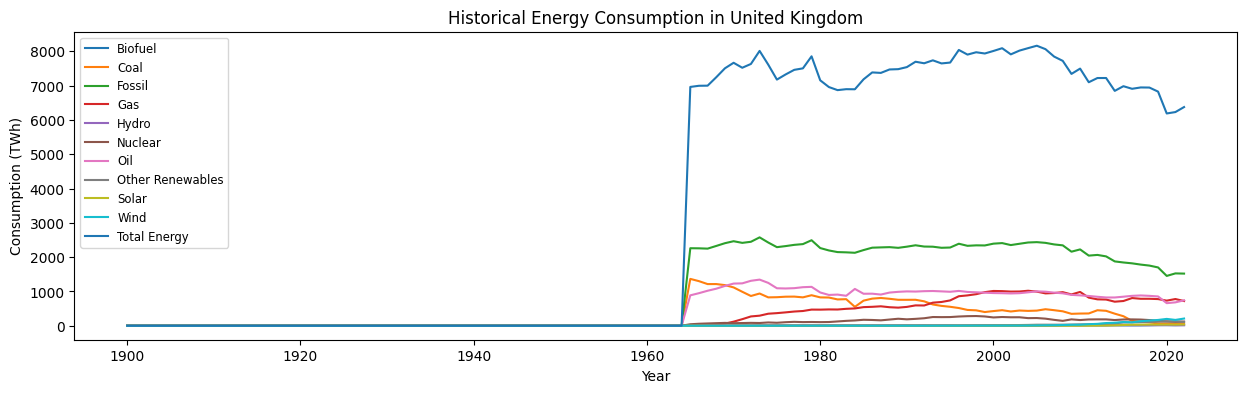

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

## plotting the historical energy consumption
plt.figure(figsize=(15,4))
plt.plot(df.index, df['biofuel_consumption'], label="Biofuel")
plt.plot(df.index, df['coal_consumption'], label="Coal")
plt.plot(df.index, df['fossil_fuel_consumption'], label="Fossil")
plt.plot(df.index, df['gas_consumption'], label="Gas")
plt.plot(df.index, df['hydro_consumption'], label="Hydro")
plt.plot(df.index, df['nuclear_consumption'], label="Nuclear")
plt.plot(df.index, df['oil_consumption'], label="Oil")
plt.plot(df.index, df['other_renewable_consumption'], label="Other Renewables")
plt.plot(df.index, df['solar_consumption'], label="Solar")
plt.plot(df.index, df['wind_consumption'], label="Wind")
plt.plot(df.index, df['total_energy_consumption'], label="Total Energy")
plt.xlabel("Year")
plt.ylabel("Consumption (TWh)")
plt.title("Historical Energy Consumption in United Kingdom")
plt.legend(fontsize='small')
plt.show()

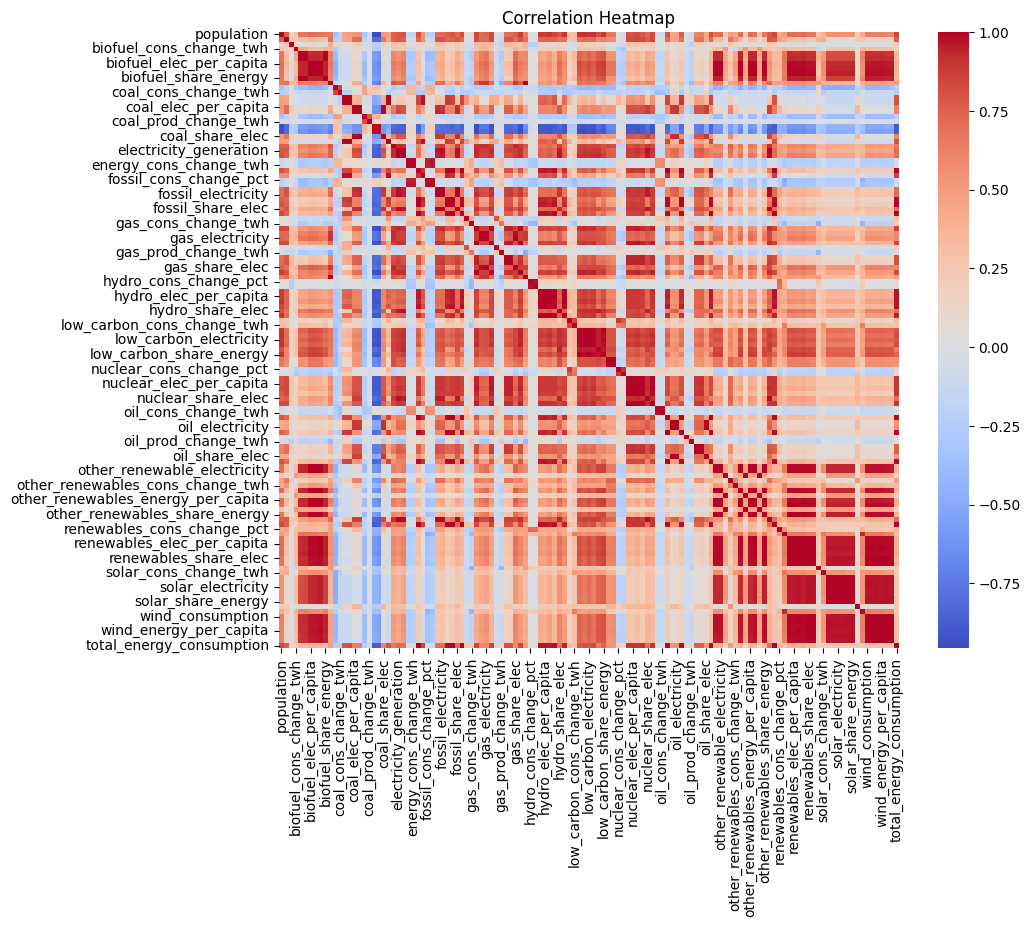

In [37]:
## corelation heatmap 

plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['int','float']).corr(),  cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [38]:
correlation = (df.select_dtypes(include=['int','float']).corr())
correlation

population       gdp  \
population                                      1.000000  0.751546   
gdp                                             0.751546  1.000000   
biofuel_cons_change_pct                         0.171550  0.258233   
biofuel_cons_change_twh                         0.274819  0.178543   
biofuel_cons_per_capita                         0.668755  0.323298   
biofuel_consumption                             0.666903  0.308280   
biofuel_elec_per_capita                         0.708243  0.363440   
biofuel_electricity                             0.699364  0.342088   
biofuel_share_elec                              0.682914  0.298530   
biofuel_share_energy                            0.658455  0.262750   
carbon_intensity_elec                           0.656366  0.688025   
coal_cons_change_pct                           -0.341821 -0.233350   
coal_cons_change_twh                           -0.217640 -0.189596   
coal_cons_per_capita                            0.475871  0.444962   
coal_consumption                                0.500048  0.474415   
coal_elec_per_capita                            0.516593  0.689852   
coal_electricity                                0.532840  0.709838   
coal_prod_change_pct                           -0.321537 -0.177246   
coal_prod_change_twh                           -0.051063 -0.041678   
coal_prod_per_capita                           -0.955454 -0.806155   
coal_production                                -0.932870 -0.802722   
coal_share_elec                                 0.507154  0.667888   
coal_share_energy                               0.495621  0.460511   
electricity_demand                              0.756730  0.751437   
electricity_generation                          0.779666  0.784586   
electricity_share_energy                        0.803694  0.756835   
energy_cons_change_pct                         -0.138952 -0.039177   
energy_cons_change_twh                         -0.138674 -0.047718   
energy_per_capita                               0.806251  0.746973   
energy_per_gdp                                  0.560841  0.578256   
fossil_cons_change_pct                         -0.227397 -0.114077   
fossil_cons_change_twh                         -0.213106 -0.121450   
fossil_elec_per_capita                          0.694699  0.800102   
fossil_electricity                              0.715402  0.808410   
fossil_energy_per_capita                        0.769680  0.728054   
fossil_fuel_consumption                         0.805350  0.754741   
fossil_share_elec                               0.719182  0.786805   
fossil_share_energy                             0.827351  0.737230   
gas_cons_change_pct                             0.091660  0.021605   
gas_cons_change_twh                             0.036699  0.067895   
gas_consumption                                 0.853952  0.832366   
gas_elec_per_capita                             0.723903  0.723184   
gas_electricity                                 0.736973  0.714089   
gas_energy_per_capita                           0.837513  0.835600   
gas_prod_change_pct                             0.063337 -0.014147   
gas_prod_change_twh                            -0.057114 -0.109039   
gas_prod_per_capita                             0.700346  0.783832   
gas_production                                  0.719352  0.792563   
gas_share_elec                                  0.758063  0.693093   
gas_share_energy                                0.881821  0.805172   
greenhouse_gas_emissions                        0.631960  0.692964   
hydro_cons_change_pct                           0.072758  0.093126   
hydro_cons_change_twh                           0.000940  0.018491   
hydro_consumption                               0.883592  0.749725   
hydro_elec_per_capita                           0.874515  0.739470   
hydro_electricity                               0.900576  0.744542   
hydro_energy_per_capita                         0.853827

## Historical Analysis and Trend Identification

The Historical Trends
            biofuel_consumption  coal_consumption  fossil_fuel_consumption  \
year                                                                         
1900-12-31                  NaN               NaN                      NaN   
1901-12-31                  NaN               NaN                      NaN   
1902-12-31                  NaN               NaN                      NaN   
1903-12-31                  NaN               NaN                      NaN   
1904-12-31                  NaN               NaN                      NaN   
1905-12-31                  NaN               NaN                      NaN   
1906-12-31                  NaN               NaN                      NaN   
1907-12-31                  NaN               NaN                      NaN   
1908-12-31                  NaN               NaN                      NaN   
1909-12-31                  NaN               NaN                      NaN   
1910-12-31                  NaN           

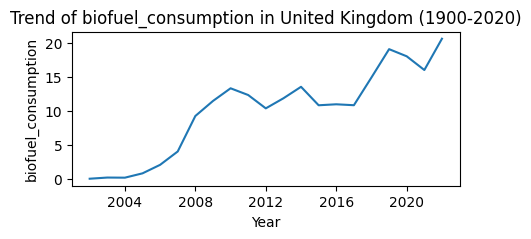

The unique values in coal_consumption:
58




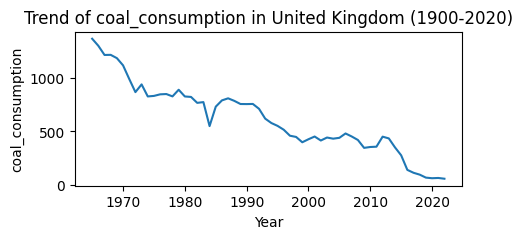

The unique values in fossil_fuel_consumption:
58




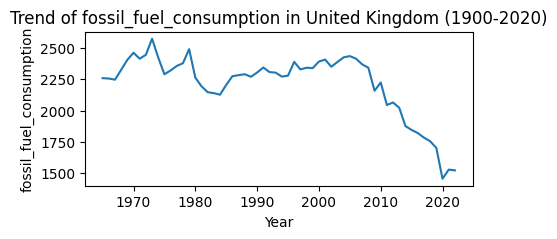

The unique values in gas_consumption:
58




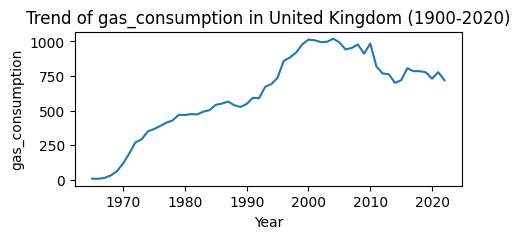

The unique values in hydro_consumption:
46




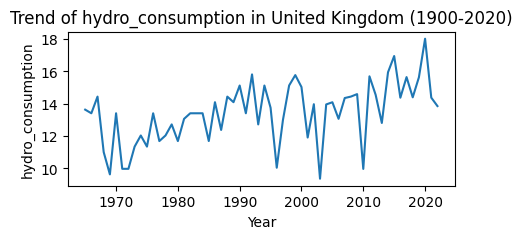

The unique values in low_carbon_consumption:
58




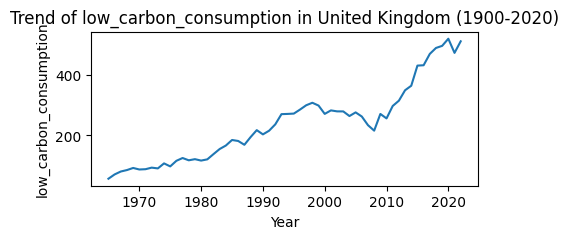

The unique values in nuclear_consumption:
58




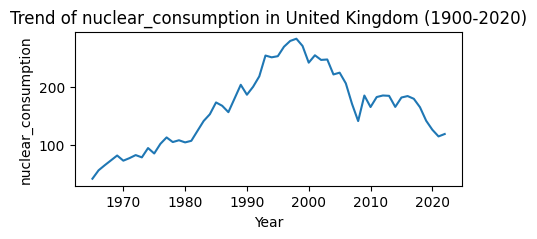

The unique values in oil_consumption:
58




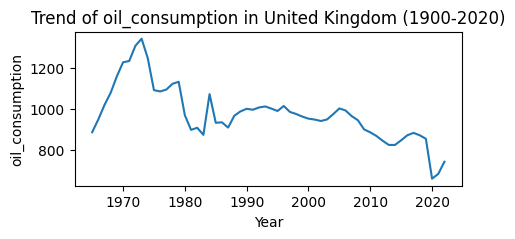

The unique values in primary_energy_consumption:
58




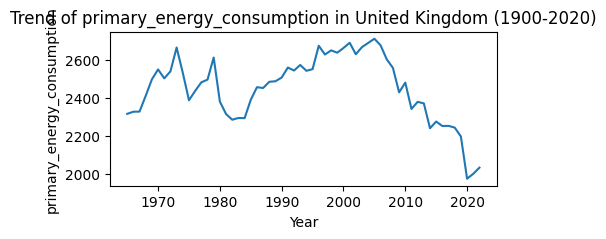

The unique values in renewables_consumption:
50




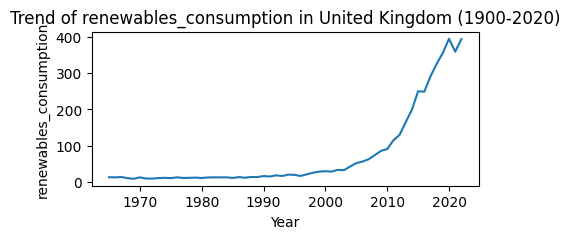

The unique values in solar_consumption:
23




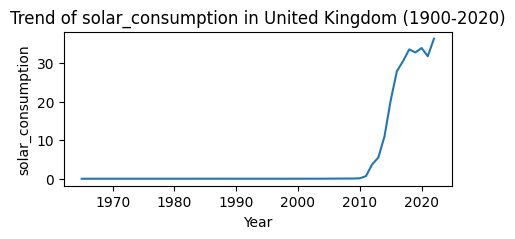

The unique values in wind_consumption:
33




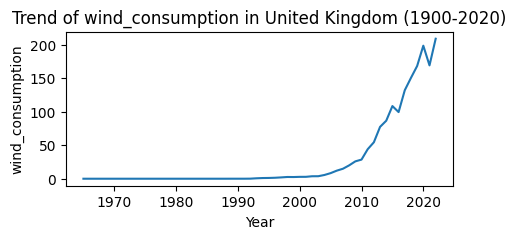

The unique values in total_energy_consumption:
59




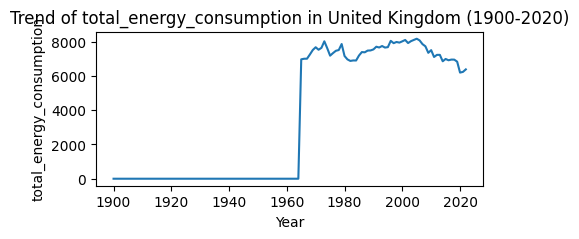


The correlation Coefficient of population and total_energy_consumption
0.8462852945819356



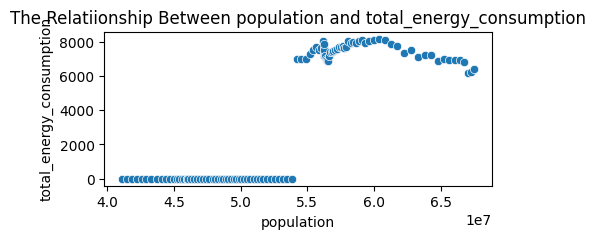


The correlation Coefficient of gdp and total_energy_consumption
0.7683007053213552



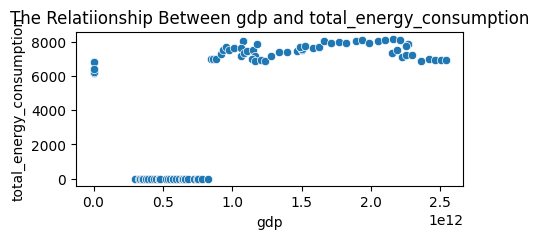


The correlation Coefficient of biofuel_electricity and total_energy_consumption
0.38121890895231947



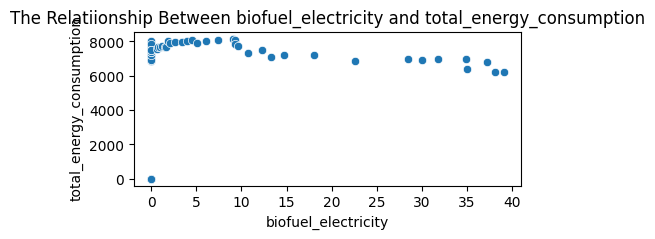

In [39]:
## Exploratory data analysis visualized
def get_trend(data):
    numeric_columns = data.select_dtypes(include=['int', 'float']).columns


    yearly_trend = data[numeric_columns].resample("Y").mean().round(2)
    print(f"The Historical Trends")
    print(yearly_trend)

    print()

   

    for column in data.columns:
        print(f"The unique values in {column}:")
        value = data[column].nunique()
        print(value)
        print("\n")
        
            # Initialize a new figure for each plot to avoid overwriting issues
        plt.figure(figsize=(5, 2))
        sns.lineplot(data=data, x=data.index, y=data[column])
        plt.title(f"Trend of {column} in United Kingdom (1900-2020)")
        plt.ylabel(f"{column}")
        plt.xlabel('Year')
        plt.show()
get_trend(energy_df)

print()

def get_correlation(data, col2,col1):
    plt.figure(figsize=(5,2))
    print(f"The correlation Coefficient of {col1} and {col2}")
    print(data[col1].corr(data[col2]))
    print()
    sns.scatterplot(data, x= col1,y=col2)
    plt.title(f"The Relatiionship Between {col1} and {col2}")
    plt.ylabel(f"{col2}")
    plt.xlabel(f"{col1}")
    plt.show()

get_correlation(df,'total_energy_consumption','population')
print()
get_correlation(df,'total_energy_consumption','gdp')
print()
get_correlation(df,'total_energy_consumption','biofuel_electricity')

In [40]:
yearly_trend = df.select_dtypes(include=["int","float"]).resample("Y").mean().round(2)
yearly_trend

population           gdp  biofuel_cons_change_pct  \
year                                                            
1900-12-31  41089602.0  3.125311e+11                     0.00   
1901-12-31  41459153.0  3.121996e+11                     0.00   
1902-12-31  41827091.0  3.198531e+11                     0.00   
1903-12-31  42193357.0  3.160846e+11                     0.00   
1904-12-31  42562831.0  3.176650e+11                     0.00   
1905-12-31  42935539.0  3.267845e+11                     0.00   
1906-12-31  43311511.0  3.374353e+11                     0.00   
1907-12-31  43690776.0  3.435541e+11                     0.00   
1908-12-31  44073361.0  3.292092e+11                     0.00   
1909-12-31  44417852.0  3.364376e+11                     0.00   
1910-12-31  44723743.0  3.466617e+11                     0.00   
1911-12-31  44990527.0  3.564402e+11                     0.00   
1912-12-31  45217688.0  3.613184e+11                     0.00   
1913-12-31  45404707.0  3.748696e+11                     0.00   
1914-12-31  45592500.0  3.744244e+11                     0.00   
1915-12-31  45781070.0  4.003313e+11                     0.00   
1916-12-31  45970420.0  4.047648e+11                     0.00   
1917-12-31  46160552.0  4.039103e+11                     0.00   
1918-12-31  46352692.0  4.019422e+11                     0.00   
1919-12-31  46487478.0  3.538911e+11                     0.00   
1920-12-31  46564792.0  3.285429e+11                     0.00   
1921-12-31  46584515.0  2.993370e+11                     0.00   
1922-12-31  46546526.0  3.279534e+11                     0.00   
1923-12-31  46450703.0  3.383499e+11                     0.00   
1924-12-31  46355077.0  3.523132e+11                     0.00   
1925-12-31  46259648.0  3.694388e+11                     0.00   
1926-12-31  46164416.0  3.558854e+11                     0.00   
1927-12-31  46069379.0  3.845356e+11                     0.00   
1928-12-31  45974538.0  3.891905e+11                     0.00   
1929-12-31  45944804.0  4.006348e+11                     0.00   
1930-12-31  45980369.0  3.977958e+11                     0.00   
1931-12-31  46081427.0  3.773461e+11                     0.00   
1932-12-31  46248173.0  3.802250e+11                     0.00   
1933-12-31  46480802.0  3.912797e+11                     0.00   
1934-12-31  46714602.0  4.171474e+11                     0.00   
1935-12-31  46949578.0  4.332478e+11                     0.00   
1936-12-31  47185735.0  4.529192e+11                     0.00   
1937-12-31  47423081.0  4.686813e+11                     0.00   
1938-12-31  47661620.0  4.743701e+11                     0.00   
1939-12-31  47890226.0  4.790462e+11                     0.00   
1940-12-31  48108804.0  5.270137e+11                     0.00   
1941-12-31  48317261.0  5.750240e+11                     0.00   
1942-12-31  48515502.0  5.893184e+11                     0.00   
1943-12-31  48703433.0  6.022514e+11                     0.00   
1944-12-31  48892093.0  5.785358e+11                     0.00   
1945-12-31  49081483.0  5.531499e+11                     0.00   
1946-12-31  49271606.0  5.291320e+11                     0.00   
1947-12-31  49462466.0  5.212865e+11                     0.00   
1948-12-31  49654066.0  5.378005e+11                     0.00   
1949-12-31  49851583.0  5.578595e+11                     0.00   
1950-12-31  50055068.0  5.544547e+11                     0.00   
1951-12-31  50271908.0  5.709927e+11                     0.00   
1952-12-31  50484812.0  5.700103e+11                     0.00   
1953-12-31  50728620.0  5.923934e+11                     0.00   
1954-12-31  50969936.0  6.165409e+11                     0.00   
1955-12-31  51193272.0  6.389138e+11                     0.00   
1956-12-31  51421616.0  6.469146e+11                     0.00   
1957-12-31  51682404.0  6.572240e+11                     0.00   
1958-12-31  51960820.0  6.558771e+11                     0.00   
1959-12-31  52241648.0  6.823901e+11           

## Seasonal And Demographic Pattern

The Demographic Patterns


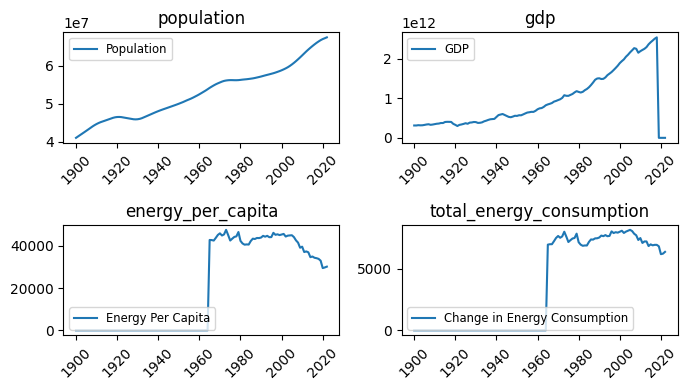


The correlation coefficient between population and total_energy_consumption is 0.85


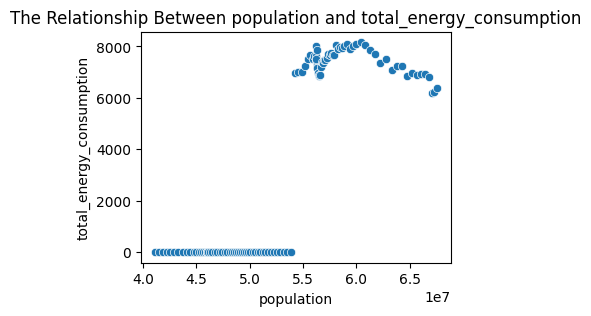


The correlation coefficient between gdp and total_energy_consumption is 0.77


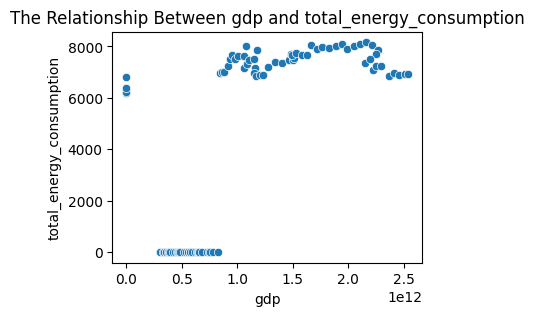


The correlation coefficient between energy_per_capita and total_energy_consumption is 1.00


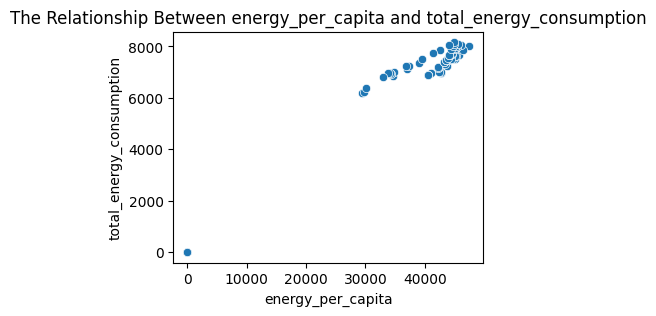

In [41]:
def explore_pattern(data, col1, col2, col3, col4):
    fig, axes = plt.subplots(2, 2, figsize=(7, 4))
    
    # Plotting on each subplot
    axes[0, 0].plot(data.index, data[col1], label="Population")
    axes[0, 0].set_title(f'{col1}')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    axes[0, 1].plot(data.index, data[col2], label="GDP")
    axes[0, 1].set_title(f'{col2}')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    axes[1, 0].plot(data.index, data[col3], label="Energy Per Capita")
    axes[1, 0].set_title(f'{col3}')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    axes[1, 1].plot(data.index, data[col4], label="Change in Energy Consumption")
    axes[1, 1].set_title(f'{col4}')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    # Adding legends
    for ax in axes.flat:
        ax.legend(fontsize='small')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

def get_correlation(data, col1, col2):
    print(f"The correlation coefficient between {col1} and {col2} is {data[col1].corr(data[col2]):.2f}")
    plt.figure(figsize=(4, 3))
    sns.scatterplot(data=data, x=col1, y=col2)
    plt.title(f'The Relationship Between {col1} and {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

print("The Demographic Patterns")
explore_pattern(df, "population", "gdp", "energy_per_capita", "total_energy_consumption")
print()
get_correlation(df, 'population', 'total_energy_consumption')
print()
get_correlation(df, 'gdp', 'total_energy_consumption')
print()
get_correlation(df, 'energy_per_capita', 'total_energy_consumption')

## Impact of Different Energy Source

C:\Users\user\AppData\Local\Temp\ipykernel_12980\2520836689.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{source}_share'] = df[source] / df['total_energy_consumption']
C:\Users\user\AppData\Local\Temp\ipykernel_12980\2520836689.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{source}_share'] = df[source] / df['total_energy_consumption']
C:\Users\user\AppData\Local\Temp\ipykernel_12980\2520836689.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

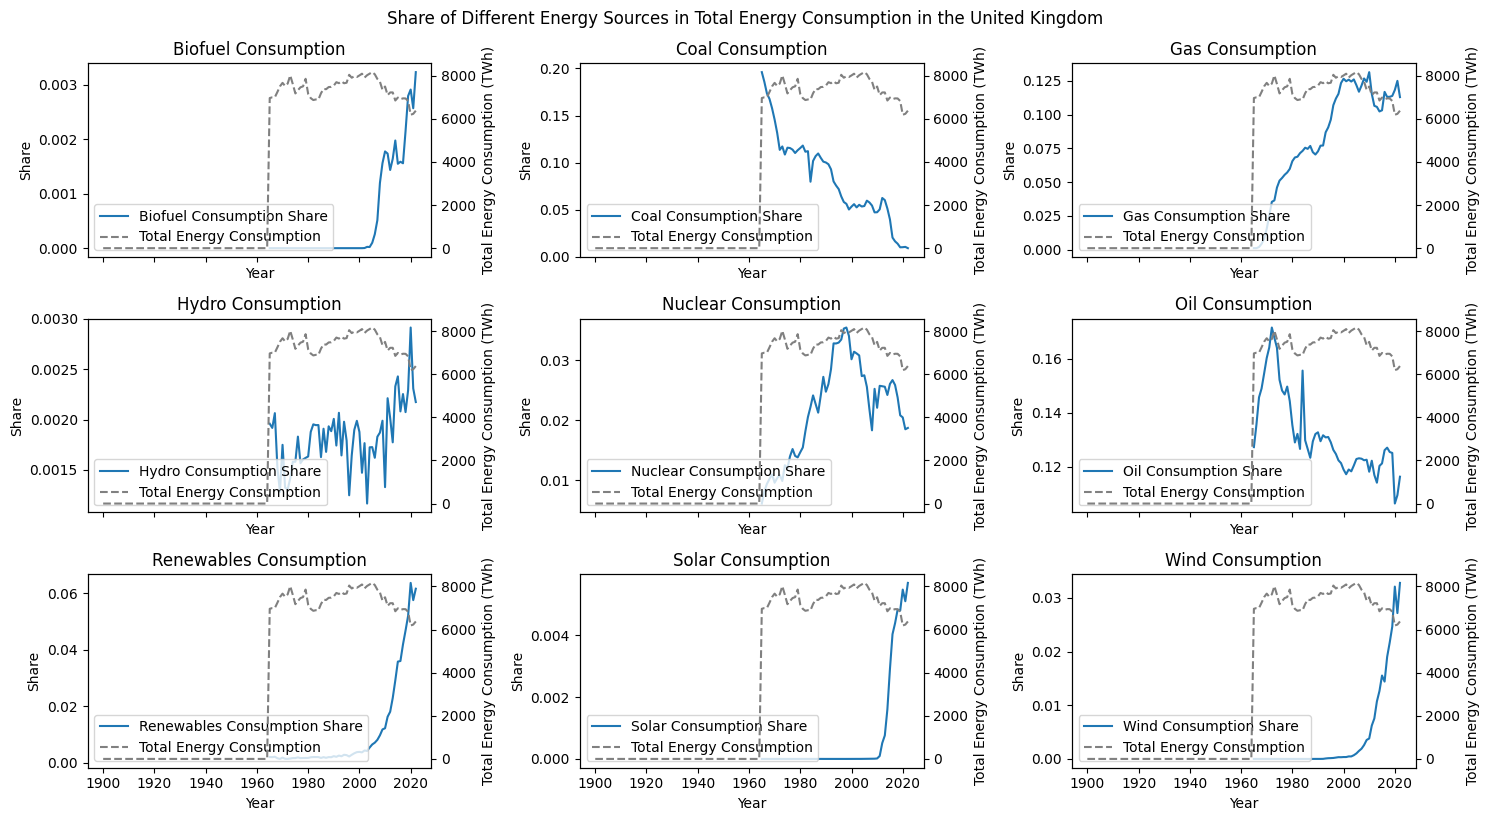

In [42]:
# Calculate the share of each energy source in total energy consumption
energy_sources = ['biofuel_consumption', 'coal_consumption', 'gas_consumption', 'hydro_consumption',
                  'nuclear_consumption', 'oil_consumption', 'renewables_consumption', 
                  'solar_consumption', 'wind_consumption']

for source in energy_sources:
    df[f'{source}_share'] = df[source] / df['total_energy_consumption']



# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8), sharex=True, sharey=False)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each energy source's share
for i, source in enumerate(energy_sources):
    # Plot the share of the energy source
    axes[i].plot(df.index, df[f'{source}_share'], label=f'{source.replace("_", " ").title()} Share')
    
    # Plot the total energy consumption
    ax2 = axes[i].twinx()
    ax2.plot(df.index, df['total_energy_consumption'], color='grey', linestyle='dashed', label='Total Energy Consumption')
    
    # Set title and labels
    axes[i].set_title(f'{source.replace("_", " ").title()}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Share')
    ax2.set_ylabel('Total Energy Consumption (TWh)')
    
    # Combine legends
    h1, l1 = axes[i].get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    axes[i].legend(h1+h2, l1+l2, loc='lower left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('Share of Different Energy Sources in Total Energy Consumption in the United Kingdom', y=1.02)
plt.show()



## Carbon Intensity and Environmental Impact

C:\Users\user\AppData\Local\Temp\ipykernel_12980\3373059674.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['carbon_intensity'] = df['greenhouse_gas_emissions'] / df['electricity_generation']


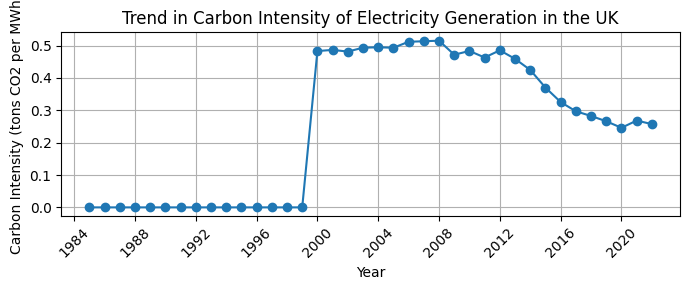

In [43]:
# Calculate carbon intensity of electricity generation
df['carbon_intensity'] = df['greenhouse_gas_emissions'] / df['electricity_generation']

## Plot the trend in carbon intensity of electricity generation
plt.figure(figsize=(7, 3))
plt.plot(df.index, df['carbon_intensity'], marker='o', linestyle='-')
plt.title('Trend in Carbon Intensity of Electricity Generation in the UK')
plt.xlabel('Year')
plt.ylabel('Carbon Intensity (tons CO2 per MWh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Forecasting Future Energy consumption 

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import pacf,acf,adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [45]:
df1 = df["total_energy_consumption"]

In [46]:
df1.tail()

year
2018-01-01    6944.022
2019-01-01    6825.516
2020-01-01    6188.307
2021-01-01    6229.479
2022-01-01    6375.378
Name: total_energy_consumption, dtype: float64

<Axes: xlabel='year'>

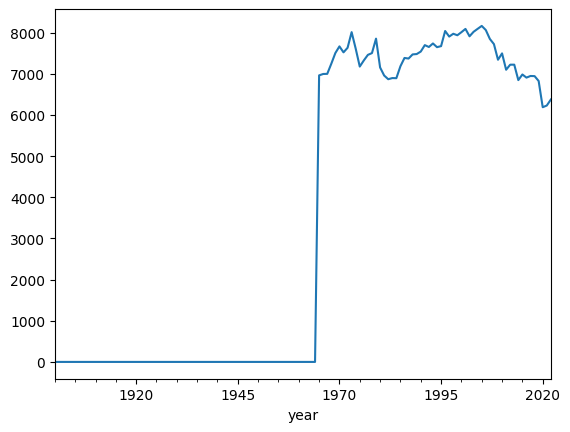

In [47]:
df1.plot()

In [48]:
adf = adfuller(df1)
adf

(-1.0299976104142998,
 0.742166764063219,
 0,
 122,
 {'1%': -3.4851223522012855,
  '5%': -2.88553750045158,
  '10%': -2.5795685622144586},
 1734.9672363087868)

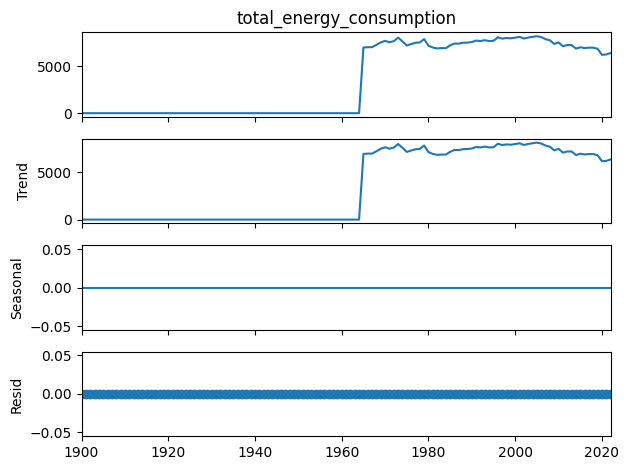

In [49]:
seasonal_decomposition = seasonal_decompose(df1)
seasonal_decomposition.plot()
plt.show()

In [50]:
pacf_value = pacf(df1)
pacf_value

array([ 1.        ,  0.98682791, -0.00835333, -0.00827475, -0.10034422,
       -0.06318385, -0.05185643,  0.00592371, -0.03849683, -0.06262084,
        0.00718429,  0.0611342 , -0.01918024, -0.0760055 , -0.03128832,
       -0.1301728 ,  0.10631306,  0.01653346, -0.0077881 , -0.04388586,
       -0.02651838])

In [51]:
acf_value = acf(df1)
acf_value

array([1.        , 0.97880492, 0.95777965, 0.93692894, 0.91392458,
       0.8898019 , 0.86490793, 0.84049232, 0.81543197, 0.78918729,
       0.76368787, 0.74005399, 0.716189  , 0.69102111, 0.66602329,
       0.63887176, 0.61451702, 0.59081044, 0.56709721, 0.54345283,
       0.51985669])

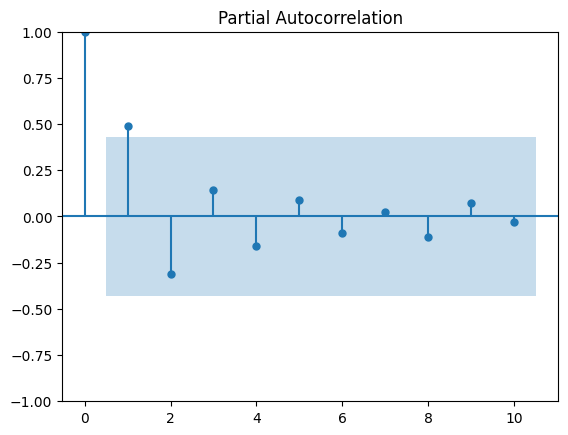

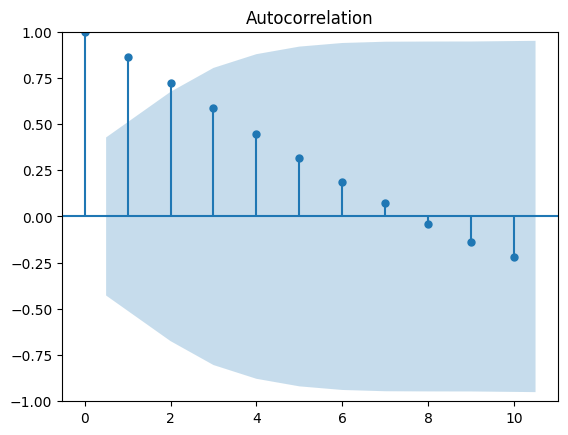

In [52]:
pacf_plot = plot_pacf(pacf_value)
acf_plot = plot_acf(acf_value)
plt.show()


## Forecasting Future Energy consumption 

In [53]:
## splitting the data into training and testing set
training_set= df1.loc["01-01-1960" : "01-01-2010"]
testing_set = df1.loc[df1.index >= "01-01-2010"]

In [54]:
## Training the model and forecasting the energy consumption for the next 20 years
model = SARIMAX(df1, order=(1,1,2), seasonal_order=(1,1,2,12)).fit()
test_forecast = model.forecast(steps=20)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


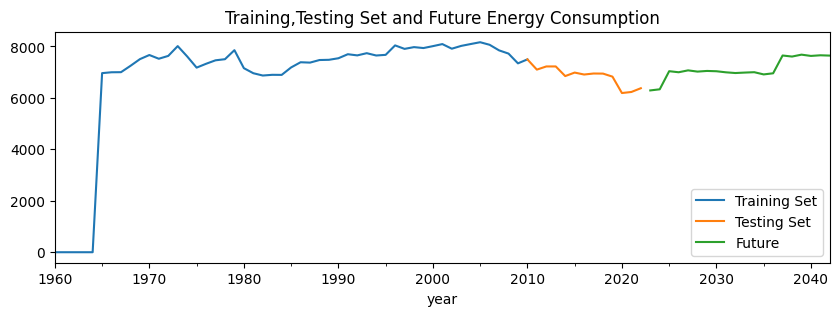

In [55]:
## visualize the training set, testing setting and the forecasted energy consumption fot the next 20 years 
fig, ax = plt.subplots(figsize=(10,3))
training_set.plot(ax=ax, label="Training Set")
testing_set.plot(ax=ax, label="Testing Set")
test_forecast.plot(ax=ax,label="Future")
plt.title("Training,Testing Set and Future Energy Consumption")
plt.legend(['Training Set', "Testing Set", "Future"])
plt.show()

In [56]:
df['enery_forecast'] = test_forecast

C:\Users\user\AppData\Local\Temp\ipykernel_12980\417630767.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['enery_forecast'] = test_forecast


In [57]:
df.to_csv('Energy Forecast.csv')

In [58]:
df.columns

Index(['country', 'iso_code', 'population', 'gdp', 'biofuel_cons_change_pct',
       'biofuel_cons_change_twh', 'biofuel_cons_per_capita',
       'biofuel_consumption', 'biofuel_elec_per_capita', 'biofuel_electricity',
       ...
       'coal_consumption_share', 'gas_consumption_share',
       'hydro_consumption_share', 'nuclear_consumption_share',
       'oil_consumption_share', 'renewables_consumption_share',
       'solar_consumption_share', 'wind_consumption_share', 'carbon_intensity',
       'enery_forecast'],
      dtype='object', length=140)

In [59]:
len(df)

123

In [65]:
forecast = test_forecast

In [68]:
forecast_df = forecast.reset_index()

In [70]:
forecast_df.to_csv("Forecast_df.csv")

### Recommendations

Based on the insights derived from this dashboard, the following recommendations are proposed:

- **Enhance Energy Efficiency**: Continue to invest in energy-efficient technologies and practices across industries and households to sustain the decline in per capita energy consumption.
- **Promote Renewable Energy**: Accelerate the development and adoption of renewable energy sources like wind, solar, and biofuel to further reduce carbon intensity and dependency on fossil fuels.
- **Support Technological Innovation**: Encourage research and development in new energy technologies and storage solutions to meet the growing energy demand projected for the mid-2030s.
- **Implement Policy Measures**: Strengthen policies and regulations aimed at reducing greenhouse gas emissions and promoting sustainable energy practices.
- **Public Awareness and Education**: Increase public awareness and education on energy conservation and sustainability to foster community participation in energy-saving initiatives.



## *Conclusion*
The project provides a comprehensive approach to forecasting energy consumption in the UK using historical data and advanced machine learning models. By understanding past trends and predicting future consumption, we can promote efficient energy use and support sustainable energy practices.